# 金融反欺诈

数据来源LendingClub官网：https://www.lendingclub.com/info/download-data.action

In [1]:
# 引入需要的包
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("LoanStats_2017Q3.csv",skiprows=1,low_memory=False)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122703 entries, 0 to 122702
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 135.7+ MB


In [75]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,32000.0,32000.0,32000.0,36 months,11.99%,1062.71,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,7000.0,7000.0,7000.0,36 months,7.97%,219.26,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,16000.0,16000.0,16000.0,36 months,7.97%,501.17,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,33000.0,33000.0,33000.0,36 months,7.21%,1022.12,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,40000.0,40000.0,40000.0,60 months,15.05%,952.65,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.ix[:4,:7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,32000.0,32000.0,32000.0,36 months,11.99,1062.71,B
1,7000.0,7000.0,7000.0,36 months,7.97,219.26,A
2,16000.0,16000.0,16000.0,36 months,7.97,501.17,A
3,33000.0,33000.0,33000.0,36 months,7.21,1022.12,A
4,40000.0,40000.0,40000.0,60 months,15.05,952.65,C


In [77]:
df.drop('id',1,inplace=True)
df.drop('member_id',1,inplace=True)

In [78]:
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

In [79]:
df.ix[:4,:7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,32000.0,32000.0,32000.0,36 months,11.99,1062.71,B
1,7000.0,7000.0,7000.0,36 months,7.97,219.26,A
2,16000.0,16000.0,16000.0,36 months,7.97,501.17,A
3,33000.0,33000.0,33000.0,36 months,7.21,1022.12,A
4,40000.0,40000.0,40000.0,60 months,15.05,952.65,C


In [80]:
(df.loan_amnt != df.funded_amnt).value_counts()

False    122701
True          2
dtype: int64

In [81]:
df.query('loan_amnt != funded_amnt').head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
122701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df.dropna(axis=0, how='all',inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122701 entries, 0 to 122700
Columns: 143 entries, loan_amnt to settlement_term
dtypes: float64(107), object(36)
memory usage: 134.8+ MB


In [84]:
df.dropna(axis=1, how='all',inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122701 entries, 0 to 122700
Columns: 141 entries, loan_amnt to settlement_term
dtypes: float64(105), object(36)
memory usage: 132.9+ MB


In [86]:
df.ix[:5,8:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,Nurse,10+ years,MORTGAGE,155000.0,Source Verified,Sep-2017,Current
1,CSM,10+ years,RENT,32000.0,Source Verified,Sep-2017,Current
2,Senior Investigator,5 years,RENT,79077.0,Not Verified,Sep-2017,Current
3,Registered Nurse,< 1 year,MORTGAGE,107000.0,Verified,Sep-2017,Current
4,Driver,9 years,MORTGAGE,120000.0,Verified,Sep-2017,Current
5,associate,10+ years,OWN,42000.0,Source Verified,Sep-2017,Current


In [87]:
print (df.emp_title.value_counts().head())
print (df.emp_title.value_counts().tail())
df.emp_title.unique().shape

Teacher             2475
Manager             2132
Owner               1510
Driver               960
Registered Nurse     928
Name: emp_title, dtype: int64
regional hr manager              1
Associate/IT                     1
Coordination center officer      1
Teaching assistance              1
Mobile maintenance technician    1
Name: emp_title, dtype: int64


(43338,)

In [88]:
df.drop(['emp_title'],1, inplace=True)

In [89]:
df.ix[:5,8:15]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan
0,10+ years,MORTGAGE,155000.0,Source Verified,Sep-2017,Current,n
1,10+ years,RENT,32000.0,Source Verified,Sep-2017,Current,n
2,5 years,RENT,79077.0,Not Verified,Sep-2017,Current,n
3,< 1 year,MORTGAGE,107000.0,Verified,Sep-2017,Current,n
4,9 years,MORTGAGE,120000.0,Verified,Sep-2017,Current,n
5,10+ years,OWN,42000.0,Source Verified,Sep-2017,Current,n


In [90]:
df.emp_length.value_counts()

10+ years    39169
< 1 year     14313
2 years      10927
3 years       9434
n/a           8660
1 year        7974
4 years       7573
5 years       7240
6 years       5186
7 years       4524
9 years       4262
8 years       3439
Name: emp_length, dtype: int64

In [91]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

In [92]:
df.emp_length.value_counts()

10    39169
1     22287
2     10927
3      9434
0      8660
4      7573
5      7240
6      5186
7      4524
9      4262
8      3439
Name: emp_length, dtype: int64

In [93]:
df.verification_status.value_counts()

Not Verified       46807
Source Verified    45535
Verified           30359
Name: verification_status, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122701 entries, 0 to 122700
Columns: 140 entries, loan_amnt to settlement_term
dtypes: float64(105), int32(1), object(34)
memory usage: 136.5+ MB


In [95]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=140)

In [96]:
pd.unique(df['loan_status'].values.ravel())

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'In Grace Period', 'Charged Off'], dtype=object)

In [97]:
for col in df.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())))

Column term has 2 unique instances
Column grade has 7 unique instances
Column sub_grade has 35 unique instances
Column home_ownership has 5 unique instances
Column verification_status has 3 unique instances
Column issue_d has 3 unique instances
Column loan_status has 6 unique instances
Column pymnt_plan has 2 unique instances
Column purpose has 12 unique instances
Column title has 12 unique instances
Column zip_code has 857 unique instances
Column addr_state has 49 unique instances
Column earliest_cr_line has 631 unique instances
Column revol_util has 1091 unique instances
Column initial_list_status has 2 unique instances
Column last_pymnt_d has 6 unique instances
Column next_pymnt_d has 4 unique instances
Column last_credit_pull_d has 8 unique instances
Column application_type has 2 unique instances
Column verification_status_joint has 4 unique instances
Column sec_app_earliest_cr_line has 539 unique instances
Column hardship_flag has 2 unique instances
Column hardship_type has 2 uniq

In [98]:
# 处理对象类型的缺失
df.select_dtypes(include=['O']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
term,122701,2,36 months,88227,0.000000
grade,122701,7,C,42146,0.000000
sub_grade,122701,35,C5,9747,0.000000
home_ownership,122701,5,MORTGAGE,59478,0.000000
verification_status,122701,3,Not Verified,46807,0.000000
issue_d,122701,3,Aug-2017,43573,0.000000
loan_status,122701,6,Current,116284,0.000000
pymnt_plan,122701,2,n,122645,0.000000
purpose,122701,12,debt_consolidation,69263,0.000000
title,122701,12,Debt consolidation,69259,0.000000


In [99]:
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

In [100]:
df.drop('verification_status_joint',1,inplace=True)

In [31]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=139)

In [32]:
df.drop('zip_code',1,inplace=True)
df.drop('addr_state',1,inplace=True)
df.drop('earliest_cr_line',1,inplace=True)
df.drop('revol_util',1,inplace=True)
df.drop('purpose',1,inplace=True)
df.drop('title',1,inplace=True)
df.drop('term',1,inplace=True)
df.drop('issue_d',1,inplace=True)
# df.drop('',1,inplace=True)
# 贷后相关的字段
df.drop(['out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','total_rec_prncp', 'grade', 'sub_grade'] ,1, inplace=True)
df.drop(['total_rec_int','total_rec_late_fee',
         'recoveries','collection_recovery_fee',
         'collection_recovery_fee' ],1, inplace=True)
df.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'],1, inplace=True)
df.drop(['policy_code'],1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122701 entries, 0 to 122700
Columns: 115 entries, loan_amnt to settlement_term
dtypes: float64(94), int32(1), object(20)
memory usage: 113.1+ MB


In [34]:
df.ix[:5,:10]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,32000.0,32000.0,32000.0,11.99,1062.71,10,MORTGAGE,155000.0,Source Verified,Current
1,7000.0,7000.0,7000.0,7.97,219.26,10,RENT,32000.0,Source Verified,Current
2,16000.0,16000.0,16000.0,7.97,501.17,5,RENT,79077.0,Not Verified,Current
3,33000.0,33000.0,33000.0,7.21,1022.12,1,MORTGAGE,107000.0,Verified,Current
4,40000.0,40000.0,40000.0,15.05,952.65,9,MORTGAGE,120000.0,Verified,Current
5,12000.0,12000.0,12000.0,7.97,375.88,10,OWN,42000.0,Source Verified,Current


In [35]:
df.ix[:5,10:21]

,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status
0,n,12.35,2.0,1.0,10.0,NaN,20.0,0.0,48309.0,42.0,w
1,n,12.27,0.0,1.0,NaN,89.0,13.0,1.0,7736.0,20.0,w
2,n,15.94,0.0,0.0,38.0,NaN,12.0,0.0,16217.0,20.0,w
3,n,19.06,0.0,0.0,NaN,NaN,25.0,0.0,18533.0,52.0,w
4,n,31.11,0.0,0.0,NaN,NaN,12.0,0.0,13389.0,26.0,w
5,n,27.74,0.0,0.0,NaN,80.0,9.0,1.0,11457.0,16.0,w


In [36]:
print (df.columns)
print (df.head(1).values)
df.info()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=115)
[[32000.0 32000.0 32000.0 11.99 1062.71 10 'MORTGAGE' 155000.0
  'Source Verified' 'Current' 'n' 12.35 2.0 1.0 10.0 nan 20.0 0.0 48309.0
  42.0 'w' 0.0 nan 'Individual' nan nan 0.0 0.0 405751.0 2.0 1.0 1.0 1.0
  8.0 15582.0 78.0 4.0 7.0 14049.0 40.0 142600.0 0.0 2.0 2.0 8.0 22542.0
  81313.0 34.5 0.0 0.0 91.0 144.0 1.0 1.0 3.0 1.0 24.0 1.0 10.0 0.0 7.0
  10.0 12.0 27.0 3.0 18.0 36.0 10.0 20.0 0.0 0.0 0.0 5.0 94.9 0.0 0.0 0.0
  527034.0 63891.0 124200.0 20034.0 nan nan nan nan nan nan nan nan nan

In [37]:
df.select_dtypes(include=['float']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,122701.0,14598.099445,9613.787458,1000.00,7000.00,12000.00,20000.00,4.000000e+04,0.000000
funded_amnt,122701.0,14598.099445,9613.787458,1000.00,7000.00,12000.00,20000.00,4.000000e+04,0.000000
funded_amnt_inv,122701.0,14594.647150,9611.583306,1000.00,7000.00,12000.00,20000.00,4.000000e+04,0.000000
int_rate,122701.0,13.470207,5.357065,5.32,9.93,12.62,16.02,3.099000e+01,0.000000
installment,122701.0,435.642974,282.991506,30.12,231.98,358.98,582.75,1.719830e+03,0.000000
annual_inc,122701.0,79010.728713,321988.081037,0.00,45500.00,65000.00,94400.00,1.100000e+08,0.000000
dti,122517.0,19.647346,20.560868,0.00,12.15,18.21,25.01,9.990000e+02,0.001500
delinq_2yrs,122701.0,0.355963,0.968668,0.00,0.00,0.00,0.00,3.200000e+01,0.000000
inq_last_6mths,122701.0,0.507192,0.803146,0.00,0.00,0.00,1.00,5.000000e+00,0.000000
mths_since_last_delinq,62236.0,33.216547,21.812893,0.00,15.00,30.00,48.00,1.780000e+02,0.492783


In [38]:
df.drop('annual_inc_joint',1,inplace=True)
df.drop('dti_joint',1,inplace=True)

In [39]:
df.select_dtypes(include=['int']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
emp_length,122701.0,5.373053,3.831536,0.0,1.0,5.0,10.0,10.0,0.0


In [40]:
df['loan_status'].value_counts()

Current               116284
Fully Paid              4172
In Grace Period         1163
Late (31-120 days)       716
Late (16-30 days)        341
Charged Off               25
Name: loan_status, dtype: int64

In [41]:
df.loan_status.replace('Fully Paid', int(1),inplace=True)
df.loan_status.replace('Current', int(1),inplace=True)
df.loan_status.replace('Late (16-30 days)', int(0),inplace=True)
df.loan_status.replace('Late (31-120 days)', int(0),inplace=True)
df.loan_status.replace('Charged Off', np.nan,inplace=True)
df.loan_status.replace('In Grace Period', np.nan,inplace=True)
df.loan_status.replace('Default', np.nan,inplace=True)
df.loan_status.value_counts()

1.0    120456
0.0      1057
Name: loan_status, dtype: int64

In [42]:
df.dropna(subset=['loan_status'],inplace=True)

In [43]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt                                 loan_amnt                                     1.000000
funded_amnt_inv                             loan_amnt                                     0.999995
                                            funded_amnt                                   0.999995
installment                                 loan_amnt                                     0.946360
                                            funded_amnt                                   0.946360
                                            funded_amnt_inv                               0.946240
total_acc                                   open_acc                                      0.734987
mths_since_last_major_derog                 mths_since_last_delinq                        0.681524
open_il_24m                                 open_il_12m                                   0.715628
open_rv_12m                                 open_acc_6m                                   0.618079
open_rv_24

In [44]:
df.drop(['funded_amnt','funded_amnt_inv', 'installment'], axis=1, inplace=True)

## 模型

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder #https://ljalphabeta.gitbooks.io/python-/content/categorical_data.html

In [46]:
Y = df.loan_status
X = df.drop('loan_status',1,inplace=False)

In [47]:
print (Y.shape)
print (sum(Y))

(121513,)
120456.0


In [48]:
X = pd.get_dummies(X)

In [49]:
print (X.columns)
print (X.head(1).values)
X.info()

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc',
       ...
       'hardship_loan_status_In Grace Period', 'hardship_loan_status_Issued',
       'hardship_loan_status_Late (16-30 days)', 'disbursement_method_Cash',
       'disbursement_method_DirectPay', 'debt_settlement_flag_N',
       'debt_settlement_flag_Y', 'debt_settlement_flag_date_Nov-2017',
       'settlement_status_ACTIVE', 'settlement_date_Nov-2017'],
      dtype='object', length=674)
[[  3.20000000e+04   1.19900000e+01   1.00000000e+01   1.55000000e+05
    1.23500000e+01   2.00000000e+00   1.00000000e+00   1.00000000e+01
               nan   2.00000000e+01   0.00000000e+00   4.83090000e+04
    4.20000000e+01   0.00000000e+00              nan   0.00000000e+00
    0.00000000e+00   4.05751000e+05   2.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   8.00000000e+00   1.55820000e+04
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121513 entries, 0 to 122700
Columns: 674 entries, loan_amnt to settlement_date_Nov-2017
dtypes: float64(89), int32(1), uint8(584)
memory usage: 151.6 MB


In [50]:
X.fillna(0.0,inplace=True)
X.fillna(0,inplace=True)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=123)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(85059, 674)
(85059,)
(36454, 674)
(36454,)


In [53]:
print (y_train.value_counts())
print (y_test.value_counts())

1.0    84291
0.0      768
Name: loan_status, dtype: int64
1.0    36165
0.0      289
Name: loan_status, dtype: int64


## Gradient Boosting Regression Tree

In [54]:
# param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
#               'max_depth': [1,2,3,4],
#               'min_samples_split': [50,100,200,400],
#               'n_estimators': [100,200,400,800]
#               }

param_grid = {'learning_rate': [0.1],
              'max_depth': [2],
              'min_samples_split': [50,100],
              'n_estimators': [100,200]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(),
                   param_grid, n_jobs=4, refit=True)

est.fit(x_train, y_train)

best_params = est.best_params_
print (best_params)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 100}


In [56]:
print (best_params)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 100, 'n_estimators': 100}


In [57]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=300,learning_rate=0.1,max_depth=1, random_state=0,loss='ls').\
fit(x_train, y_train)

Wall time: 2min 2s


In [58]:
est.score(x_test,y_test)

0.093805631319468841

In [73]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=100,learning_rate=0.1,max_depth=2, random_state=0,loss='ls').\
fit(x_train, y_train)

Wall time: 1min 52s


In [75]:
est.score(x_test,y_test)

0.094422760643230741

In [64]:
def compute_ks(data):

    sorted_list = data.sort_values(['predict'], ascending=[True])

    total_bad = sorted_list['label'].sum(axis=None, skipna=None, level=None, numeric_only=None) / 3
    total_good = sorted_list.shape[0] - total_bad

    # print "total_bad = ", total_bad
    # print "total_good = ", total_good

    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0
    for index, row in sorted_list.iterrows():
        if row['label'] == 3:
            bad_count += 1.0
        else:
            good_count += 1.0

        val = bad_count/total_bad - good_count/total_good
        max_ks = max(max_ks, val)

    return max_ks

In [65]:
test_pd = pd.DataFrame()
test_pd['predict'] = est.predict(x_test)
test_pd['label'] = y_test
# df['predict'] = est.predict(x_test)
print (compute_ks(test_pd[['label','predict']]))

0.0


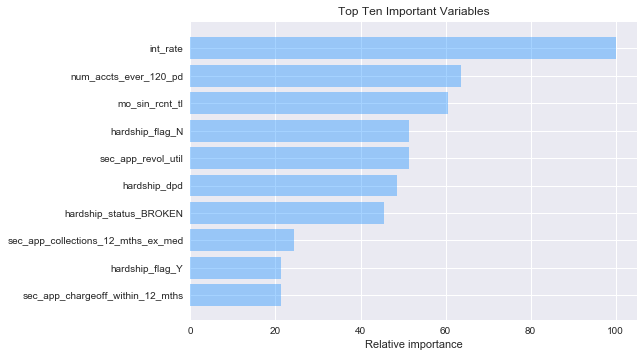

In [66]:
# Top Ten
feature_importance = est.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

## xgboost

In [67]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

0.992703132715
0.0
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.06        0.02        0.02        0.
  0.02        0.02        0.04        0.          0.     

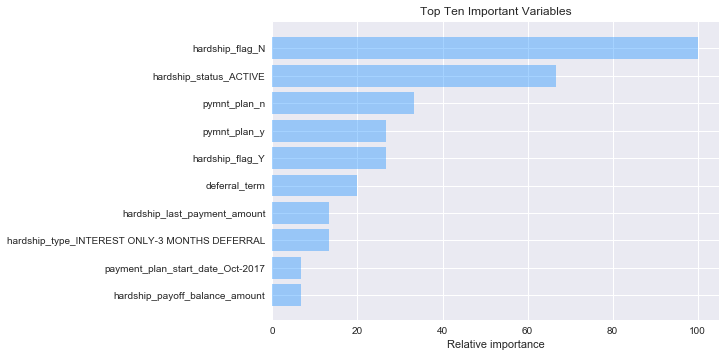

In [68]:
# XGBoost
clf2 = xgb.XGBClassifier(n_estimators=50, max_depth=1, 
                            learning_rate=0.01, subsample=0.8, colsample_bytree=0.3,scale_pos_weight=3.0, 
                             silent=True, nthread=-1, seed=0, missing=None,objective='binary:logistic', 
                             reg_alpha=1, reg_lambda=1, 
                             gamma=0, min_child_weight=1, 
                             max_delta_step=0,base_score=0.5)

clf2.fit(x_train, y_train)
print (clf2.score(x_test, y_test))
test_pd2 = pd.DataFrame()
test_pd2['predict'] = clf2.predict(x_test)
test_pd2['label'] = y_test
print (compute_ks(test_pd[['label','predict']]))
print (clf2.feature_importances_)
# Top Ten
feature_importance = clf2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

0.0781188024072
0.0
[ 0.00934535  0.05820702  0.00572011  0.01122002  0.          0.00194813
  0.00062922  0.00313123  0.00383891  0.00113804  0.          0.00177271
  0.00301115  0.          0.00332113  0.          0.00173457  0.00776029
  0.00093074  0.00897796  0.00275928  0.00275824  0.00317329  0.00083687
  0.00505228  0.          0.00617999  0.00193195  0.00668731  0.01268591
  0.0035866   0.00700212  0.00066759  0.00288191  0.00382544  0.02232851
  0.00339079  0.00080144  0.00209177  0.012121    0.00619191  0.
  0.01273636  0.00467321  0.00355246  0.00293442  0.          0.0033399
  0.01919654  0.00245134  0.00213253  0.0060552   0.00173259  0.01613112
  0.00408381  0.00166823  0.          0.00326974  0.          0.          0.0073789
  0.00027772  0.00459445  0.          0.00277507  0.          0.00201141
  0.00349939  0.00149081  0.00125531  0.00571108  0.00110794  0.00484945
  0.00262624  0.02494848  0.00183837  0.00506605  0.00354827  0.01120073
  0.00355682  0.          0. 

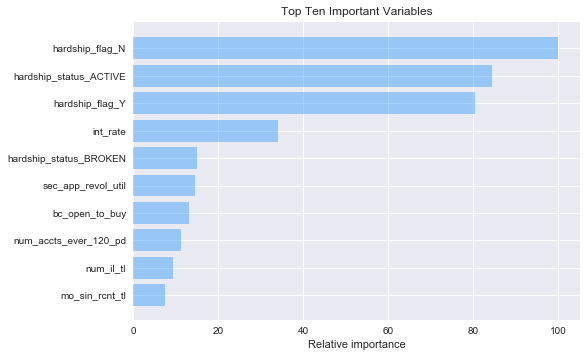

In [69]:
# RFR
clf3 = RandomForestRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf3.fit(x_train, y_train)
print (clf3.score(x_test, y_test))
test_pd3 = pd.DataFrame()
test_pd3['predict'] = clf3.predict(x_test)
test_pd3['label'] = y_test
print (compute_ks(test_pd[['label','predict']]))
print (clf3.feature_importances_)
# Top Ten
feature_importance = clf3.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

0.083977635786
0.0
[  2.43748564e-03   6.27114395e-02   1.49732106e-03   8.62104065e-03
   3.37163314e-03   1.24630302e-03   8.55673459e-04   2.12516547e-03
   0.00000000e+00   3.08626711e-04   0.00000000e+00   3.10124001e-03
   1.65168788e-03   1.03032766e-03   9.55937124e-04   0.00000000e+00
   6.86885107e-04   2.26527798e-03   2.86757295e-03   4.40784707e-03
   1.77503360e-03   0.00000000e+00   0.00000000e+00   6.54784574e-03
   6.84219766e-04   0.00000000e+00   0.00000000e+00   4.56141489e-03
   1.57675906e-03   8.58666329e-04   0.00000000e+00   4.87468605e-03
   1.67147421e-03   2.67798165e-03   1.64015689e-03   8.11192440e-03
   2.96726892e-03   1.04166053e-03   1.19989120e-03   1.53807303e-03
   9.80760252e-04   6.23338319e-03   1.26294885e-02   6.25780010e-04
   5.88456151e-04   2.13697589e-03   1.47061984e-03   1.58087793e-03
   1.34071020e-02   1.02632965e-03   2.14763974e-03   6.25780010e-04
   7.95932363e-04   1.06070606e-02   0.00000000e+00   6.81648684e-04
   0.00000000e+

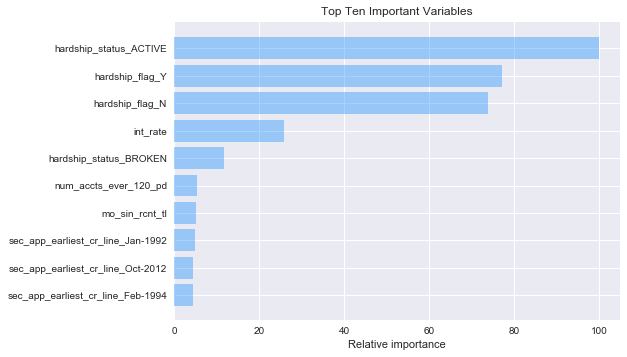

In [70]:
# XTR
clf4 = ExtraTreesRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf4.fit(x_train, y_train)
print (clf4.score(x_test, y_test))
test_pd4 = pd.DataFrame()
test_pd4['predict'] = clf4.predict(x_test)
test_pd4['label'] = y_test
print (compute_ks(test_pd[['label','predict']]))
print (clf4.feature_importances_)
# Top Ten
feature_importance = clf4.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')